# **TUGAS Pertemuan 9 (MULTIMEDIA DATABASE)**
# **JELLI KURNILIA - 121450083**
# **TEKNOLOGI BASIS DATA (RC)**

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## `ANALISIS`
### Kumpulan data yang digunakan dalam artikel tersebut adalah CIFAR-10, yang merupakan kumpulan data gambar dari Canadian Institute for Advanced Research. CIFAR-10 terdiri dari 60.000 gambar berwarna dengan ukuran 32x32 piksel. Gambar-gambar ini termasuk dalam berbagai kelas objek, seperti anjing, kucing, dan pesawat terbang. Karena data berukuran besar maka saya menyimpannya dalam gdrive dan mengkoneksikanya ke colab.

In [31]:
import numpy as np
import pickle
from pathlib import Path

# Path to the unzipped CIFAR data
data_dir = Path("/content/drive/MyDrive/TBD-JelliKurnilia/cifar-10-batches-py/")

# Unpickle function provided by the CIFAR hosts
def unpickle(file):
    with open(file, "rb") as fo:
        dict = pickle.load(fo, encoding="bytes")
    return dict

images, labels = [], []
for batch in data_dir.glob("data_batch_*"):
    batch_data = unpickle(batch)
    for i, flat_im in enumerate(batch_data[b"data"]):
        im_channels = []
        # Each image is flattened, with channels in order of R, G, B
        for j in range(3):
            im_channels.append(
                flat_im[j * 1024 : (j + 1) * 1024].reshape((32, 32))
            )
        # Reconstruct the original image
        images.append(np.dstack((im_channels)))
        # Save the label
        labels.append(batch_data[b"labels"][i])

print("Loaded CIFAR-10 training set:")
print(f" - np.shape(images)     {np.shape(images)}")
print(f" - np.shape(labels)     {np.shape(labels)}")

Loaded CIFAR-10 training set:
 - np.shape(images)     (50000, 32, 32, 3)
 - np.shape(labels)     (50000,)


output diatas menyimpulkan bahwa dataset CIFAR-10 yang dimuat terdiri dari 50.000 gambar berwarna dengan resolusi 32x32 piksel, yang masing-masing dikaitkan dengan label kelas yang sesuai.

# `ANALISIS`

Kode di atas merupakan bagian dari artikel yang menjelaskan tentang cara menyimpan dan mengakses banyak gambar dalam Python, khususnya menggunakan dataset CIFAR-10. Kode tersebut dimulai dengan mengimpor modul-modul yang diperlukan, yaitu `numpy` untuk operasi array dan matriks, `pickle` untuk membaca data yang disimpan dalam format pickle, dan `pathlib` untuk memanipulasi path file. Selanjutnya, kode tersebut mendefinisikan variabel `data_dir` yang berisi path ke direktori data CIFAR-10 yang telah di-unzip.
Kemudian, terdapat fungsi `unpickle(file)` yang digunakan untuk membaca file pickle CIFAR-10. Fungsi ini membuka file yang diberikan, membaca data menggunakan `pickle.load()`, dan mengembalikan dictionary yang berisi data CIFAR-10.

Setelah itu, dilakukan iterasi melalui setiap batch data dalam `data_dir` menggunakan loop `for batch in data_dir.glob("data_batch_*")`. Setiap batch data di-"unpickle" menggunakan fungsi `unpickle()` dan disimpan dalam variabel `batch_data`. Selanjutnya, terdapat loop `for i, flat_im in enumerate(batch_data[b"data"]):` yang digunakan untuk mengiterasi melalui setiap gambar dalam batch data. Setiap gambar dalam bentuk flat array direkonstruksi menjadi array tiga dimensi dengan tiga saluran warna (R, G, B). Proses ini dilakukan dengan membagi gambar flat menjadi tiga bagian yang mewakili saluran warna masing-masing, yaitu R, G, dan B. Setelah itu, array tiga dimensi ini digabungkan menggunakan `np.dstack()` untuk menghasilkan gambar asli. Gambar-gambar ini disimpan dalam list `images`.

Selain itu, label-label gambar juga disimpan dalam list `labels` menggunakan pernyataan `labels.append(batch_data[b"labels"][i])`. Terakhir, dilakukan cetakan untuk menampilkan informasi tentang CIFAR-10 training set yang telah dimuat. Informasi yang ditampilkan adalah bentuk (`shape`) dari array `images` dan `labels` menggunakan `np.shape()`.

In [5]:
!pip install Pillow

# `ANALISIS`
Perintah ini digunakan untuk menginstal paket Pillow. Pillow adalah fork dari Python Imaging Library (PIL) yang merupakan salah satu perpustakaan populer untuk memanipulasi gambar dalam Python. Dengan menginstal Pillow, Anda dapat melakukan berbagai operasi gambar seperti membuka, menyimpan, memodifikasi, dan mengubah format gambar.

### Getting Started With LMDB

In [6]:
!pip install lmdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 6.0 MB/s eta 0:00:00


# `ANALISIS`
Perintah ini digunakan untuk menginstal paket lmdb. LMDB adalah sistem manajemen basis data berbasis file yang memetakan seluruh basis data ke dalam memori, yang memungkinkan akses yang cepat dan efisien.


### Getting Started With HDF5

In [7]:
!pip install h5py

# `ANALISIS`
Perintah ini digunakan untuk menginstal paket h5py. HDF5 adalah format file yang digunakan untuk menyimpan dan mengelola data yang besar dan kompleks. H5py memungkinkan Anda untuk membuat, membaca, menulis, dan memanipulasi dataset dalam file HDF5.

### Storing a Single Image

In [33]:
from pathlib import Path

disk_dir = Path("/content/drive/MyDrive/TBD-JelliKurnilia/disk/")
lmdb_dir = Path("/content/drive/MyDrive/TBD-JelliKurnilia/lmdb/")
hdf5_dir = Path("/content/drive/MyDrive/TBD-JelliKurnilia/hdf5/")

In [34]:
disk_dir.mkdir(parents=True, exist_ok=True)
lmdb_dir.mkdir(parents=True, exist_ok=True)
hdf5_dir.mkdir(parents=True, exist_ok=True)

# `ANALISIS`
membuat direktori atau folder untuk menyimpan gambar dalam tiga format yang berbeda: disk, LMDB, dan HDF5. Kemudian, ada tiga variabel yang didefinisikan: disk_dir, lmdb_dir, dan hdf5_dir. Ketiga variabel ini mewakili jalur ke direktori tempat gambar akan disimpan dalam format yang sesuai.

Selanjutnya, metode mkdir() digunakan pada masing-masing variabel direktori untuk membuat direktori tersebut jika belum ada. Argumen parents=True memastikan bahwa direktori yang ada dalam jalur juga dibuat jika belum ada, dan exist_ok=True memungkinkan metode ini untuk berjalan tanpa kesalahan jika direktori sudah ada.

In [35]:
from PIL import Image
import csv

def store_single_disk(image, image_id, label):
    """ Stores a single image as a .png file on disk.
        Parameters:
        ---------------
        image       image array, (32, 32, 3) to be stored
        image_id    integer unique ID for image
        label       image label
    """
    Image.fromarray(image).save(disk_dir / f"{image_id}.png")

    with open(disk_dir / f"{image_id}.csv", "wt") as csvfile:
        writer = csv.writer(
            csvfile, delimiter=" ", quotechar="|", quoting=csv.QUOTE_MINIMAL
        )
        writer.writerow([label])

# `ANALISIS`
Fungsi `store_single_disk` adalah sebuah fungsi yang didefinisikan untuk menyimpan gambar tunggal ke dalam format file .png di disk. Fungsi ini menerima tiga parameter: `image` (array gambar dengan ukuran (32, 32, 3)), `image_id` (ID unik untuk gambar), dan `label` (label gambar).

Fungsi ini pertama-tama menggunakan modul `Image` dari PIL (Pillow) untuk mengubah array gambar menjadi objek `Image` menggunakan `Image.fromarray(image)`. Kemudian, gambar tersebut disimpan sebagai file .png di direktori yang ditentukan dengan menggunakan metode `save` pada objek `Image`, dengan menggunakan `disk_dir / f"{image_id}.png"` untuk menentukan jalur file yang tepat.

Selanjutnya, fungsi membuka file CSV dengan nama `{image_id}.csv` menggunakan modul `csv`. Objek `csv.writer` dibuat dengan parameter file CSV yang dibuka, dan pengaturan seperti delimiter (pemisah) yang diatur sebagai spasi, quotechar (karakter penutup) yang diatur sebagai "|", dan quoting (pengutipan) yang diatur sebagai `csv.QUOTE_MINIMAL`. Kemudian, label gambar ditulis ke dalam file CSV menggunakan metode `writer.writerow([label])`.

Dengan menggunakan fungsi `store_single_disk`, gambar tunggal dapat dengan mudah disimpan dalam format .png di disk, dan label gambar juga dapat ditulis ke dalam file CSV yang sesuai.

### Storing to LMDB

In [36]:
class CIFAR_Image:
    def __init__(self, image, label):
        # Dimensions of image for reconstruction - not really necessary
        # for this dataset, but some datasets may include images of
        # varying sizes
        self.channels = image.shape[2]
        self.size = image.shape[:2]

        self.image = image.tobytes()
        self.label = label

    def get_image(self):
        """ Returns the image as a numpy array. """
        image = np.frombuffer(self.image, dtype=np.uint8)
        return image.reshape(*self.size, self.channels)

Kelas CIFAR_Image merupakan sebuah kelas yang digunakan untuk merepresentasikan gambar dan labelnya. Pada konstruktor (__init__), dimensi dan ukuran gambar disimpan sebagai atribut. Gambar diubah menjadi bentuk byte (self.image = image.tobytes()) dan label disimpan sebagai atribut self.label. Method get_image digunakan untuk mengembalikan gambar sebagai array numpy. Gambar dikembalikan dengan mengonversi byte kembali menjadi array menggunakan np.frombuffer dan mengembalikannya dalam dimensi yang sesuai menggunakan reshape.


In [37]:
import lmdb
import pickle

def store_single_lmdb(image, image_id, label):
    """ Stores a single image to a LMDB.
        Parameters:
        ---------------
        image       image array, (32, 32, 3) to be stored
        image_id    integer unique ID for image
        label       image label
    """
    map_size = image.nbytes * 10

    # Create a new LMDB environment
    env = lmdb.open(str(lmdb_dir / f"single_lmdb"), map_size=map_size)

    # Start a new write transaction
    with env.begin(write=True) as txn:
        # All key-value pairs need to be strings
        value = CIFAR_Image(image, label)
        key = f"{image_id:08}"
        txn.put(key.encode("ascii"), pickle.dumps(value))
    env.close()

Fungsi store_single_lmdb didefinisikan untuk menyimpan gambar tunggal ke dalam format LMDB. Fungsi ini menerima tiga parameter: image (array gambar dengan ukuran (32, 32, 3)), image_id (ID unik untuk gambar), dan label (label gambar).

map_size dihitung sebagai jumlah byte yang diperlukan untuk menyimpan gambar dalam LMDB. Nilai ini digunakan untuk mengatur ukuran peta (map) dalam lingkungan LMDB yang akan dibuat. LMDB baru dibuat menggunakan lmdb.open. Direktori LMDB dan nama file ditentukan dengan menggunakan lmdb_dir / f"single_lmdb". Ukuran peta (map) disetel dengan nilai map_size.

Pada baris ke-23 hingga 26, transaksi tulis baru dimulai menggunakan env.begin(write=True). Setiap pasangan kunci-nilai dalam LMDB harus berupa string. Objek CIFAR_Image dibuat sebagai nilai, dan image_id diubah menjadi kunci dalam bentuk string dengan format delapan digit. Nilai dikonversi menjadi byte menggunakan pickle.dumps, dan pasangan kunci-nilai ditambahkan ke dalam transaksi menggunakan txn.put. Lingkungan LMDB ditutup dengan env.close() untuk mengakhiri transaksi dan memastikan data tersimpan dengan aman.
```
Dengan menggunakan fungsi store_single_lmdb, gambar tunggal dapat disimpan
dalam format LMDB dengan mengonversi nilai gambar menjadi byte dan
menyimpannya dalam lingkungan LMDB dengan kunci image_id dan nilai CIFAR_Image.
```

### Storing With HDF5

In [38]:
import h5py

def store_single_hdf5(image, image_id, label):
    """ Stores a single image to an HDF5 file.
        Parameters:
        ---------------
        image       image array, (32, 32, 3) to be stored
        image_id    integer unique ID for image
        label       image label
    """
    # Create a new HDF5 file
    file = h5py.File(hdf5_dir / f"{image_id}.h5", "w")

    # Create a dataset in the file
    dataset = file.create_dataset(
        "image", np.shape(image), h5py.h5t.STD_U8BE, data=image
    )
    meta_set = file.create_dataset(
        "meta", np.shape(label), h5py.h5t.STD_U8BE, data=label
    )
    file.close()

 Fungsi store_single_hdf5 didefinisikan untuk melakukan penyimpanan tersebut. Fungsi ini menerima tiga parameter, yaitu image yang merupakan array gambar dengan ukuran (32, 32, 3), image_id yang merupakan ID unik untuk gambar, dan label yang merepresentasikan label dari gambar tersebut. Proses penyimpanan dimulai dengan pembuatan file HDF5 baru pada baris ke-7 menggunakan h5py.File. Nama file HDF5 ditentukan berdasarkan image_id dengan menggunakan ekstensi ".h5". Selanjutnya, pada baris ke-10, dataset dengan nama "image" dibuat di dalam file tersebut menggunakan create_dataset. Dataset ini memiliki ukuran yang sama dengan image dan menggunakan tipe data h5py.h5t.STD_U8BE yang merupakan unsigned 8-bit big-endian. Data gambar kemudian disimpan ke dalam dataset ini.

 ```
 Dengan menggunakan fungsi store_single_hdf5, gambar tunggal dapat dengan
 mudah disimpan dalam format file HDF5. Dataset "image" digunakan untuk
 menyimpan gambar, sementara dataset "meta" digunakan untuk menyimpan label gambar.
 ```

### Experiments for Storing a Single Image

In [39]:

_store_single_funcs = dict(
    disk=store_single_disk, lmdb=store_single_lmdb, hdf5=store_single_hdf5
)

In [40]:
from timeit import timeit

store_single_timings = dict()

for method in ("disk", "lmdb", "hdf5"):
    t = timeit(
        "_store_single_funcs[method](image, 0, label)",
        setup="image=images[0]; label=labels[0]",
        number=1,
        globals=globals(),
    )
    store_single_timings[method] = t
    print(f"Method: {method}, Time usage: {t}")

Method: disk, Time usage: 0.020252908000202297
Method: lmdb, Time usage: 0.024283320999984426
Method: hdf5, Time usage: 0.01285695200022019


Kode diatas dibuat untuk mengukur waktu eksekusi dari tiga metode penyimpanan yang berbeda: disk, lmdb, dan hdf5. Tujuannya adalah untuk membandingkan performa dari ketiga metode tersebut dalam menyimpan data gambar tunggal. Dan dapat disimpulkan bahwa berdasarkan waktu yang tercatat dalam output tersebut, metode "hdf5" memiliki waktu penggunaan yang paling rendah yaitu 0.01285695200022019.

dictionary _store_single_funcs dibuat untuk menyimpan fungsi-fungsi penyimpanan, dengan kunci-kunci dictionary adalah metode penyimpanan dan nilai-nilainya adalah fungsi-fungsi yang sesuai. dictionary store_single_timings dibuat untuk menyimpan waktu eksekusi dari setiap metode penyimpanan. Dilakukan iterasi pada metode penyimpanan yang tersedia.
Pada setiap iterasi, dilakukan pengecekan apakah daftar images dan labels tidak kosong. Jika tidak kosong, dilakukan pengukuran waktu eksekusi menggunakan fungsi timeit.Peng ukuran waktu eksekusi dilakukan dengan memanggil fungsi penyimpanan yang sesuai melalui _store_single_funcs[method], dan menggunakan timeit untuk mengukur waktu eksekusi. Hasil waktu eksekusi dicatat dalam store_single_timings dengan kunci sesuai metode penyimpanan yang sedang dieksekusi.Waktu eksekusi untuk setiap metode penyimpanan dicetak menggunakan print. Jika daftar images atau labels kosong, pesan error akan dicetak.

### Storing Many Images

### Adjusting the Code for Many Images

In [47]:
def store_many_disk(images, labels):
    """ Stores an array of images to disk
        Parameters:
        ---------------
        images       images array, (N, 32, 32, 3) to be stored
        labels       labels array, (N, 1) to be stored
    """
    num_images = len(images)

    # Save all the images one by one
    for i, image in enumerate(images):
        Image.fromarray(image).save(disk_dir / f"{i}.png")

    # Save all the labels to the csv file
    with open(disk_dir / f"{num_images}.csv", "w") as csvfile:
        writer = csv.writer(
            csvfile, delimiter=" ", quotechar="|", quoting=csv.QUOTE_MINIMAL
        )
        for label in labels:
            # This typically would be more than just one value per row
            writer.writerow([label])

def store_many_lmdb(images, labels):
    """ Stores an array of images to LMDB.
        Parameters:
        ---------------
        images       images array, (N, 32, 32, 3) to be stored
        labels       labels array, (N, 1) to be stored
    """
    num_images = len(images)

    map_size = num_images * images[0].nbytes * 10

    # Create a new LMDB DB for all the images
    env = lmdb.open(str(lmdb_dir / f"{num_images}_lmdb"), map_size=map_size)

    # Same as before — but let's write all the images in a single transaction
    with env.begin(write=True) as txn:
        for i in range(num_images):
            # All key-value pairs need to be Strings
            value = CIFAR_Image(images[i], labels[i])
            key = f"{i:08}"
            txn.put(key.encode("ascii"), pickle.dumps(value))
    env.close()

def store_many_hdf5(images, labels):
    """ Stores an array of images to HDF5.
        Parameters:
        ---------------
        images       images array, (N, 32, 32, 3) to be stored
        labels       labels array, (N, 1) to be stored
    """
    num_images = len(images)

    # Create a new HDF5 file
    file = h5py.File(hdf5_dir / f"{num_images}_many.h5", "w")

    # Create a dataset in the file
    dataset = file.create_dataset(
        "images", np.shape(images), h5py.h5t.STD_U8BE, data=images
    )
    meta_set = file.create_dataset(
        "meta", np.shape(labels), h5py.h5t.STD_U8BE, data=labels
    )
    file.close()

Kode diatas dibuat untuk menyimpan beberapa metode penyimpanan yang berbeda untuk sebuah array gambar dan label. Kode ini berfungsi untuk menyimpan array gambar dan label ke dalam format penyimpanan yang berbeda, yaitu disk, LMDB, dan HDF5.

Terdapat tiga fungsi penyimpanan yang berbeda: `store_many_disk`, `store_many_lmdb`, dan `store_many_hdf5`.
Fungsi `store_many_disk` digunakan untuk menyimpan array gambar dan label ke dalam format disk. Setiap gambar disimpan satu per satu ke dalam file PNG, dan label-label disimpan dalam file CSV. Fungsi `store_many_lmdb` digunakan untuk menyimpan array gambar dan label ke dalam format LMDB. LMDB adalah basis data berorientasi kunci yang efisien untuk menyimpan data dengan kunci dan nilai. Pada fungsi ini, gambar-gambar dan label-label disimpan dalam satu transaksi LMDB.

Fungsi `store_many_hdf5` digunakan untuk menyimpan array gambar dan label ke dalam format HDF5. HDF5 adalah sebuah format file untuk menyimpan dan mengatur data besar. Gambar-gambar dan label-label disimpan dalam file HDF5 dengan dataset yang sesuai. Dengan menggunakan kode di atas, array gambar dan label dapat disimpan ke dalam tiga format penyimpanan yang berbeda, yaitu disk, LMDB, dan HDF5, sesuai dengan fungsi-fungsi yang tersedia.

## Preparing the Dataset

In [48]:
cutoffs = [10, 100, 1000, 10000, 100000]

# Let's double our images so that we have 100,000
images = np.concatenate((images, images), axis=0)
labels = np.concatenate((labels, labels), axis=0)

# Make sure you actually have 100,000 images and labels
print(np.shape(images))
print(np.shape(labels))

(200000, 32, 32, 3)
(200000,)


Output tersebut menunjukkan bahwa setelah melakukan penggandaan gambar dan label, jumlah gambar dan label dalam dataset telah meningkat menjadi 200.000. Sebelumnya, jumlah gambar dan label adalah 100.000.
Selanjutnya, output (200000, 32, 32, 3) menunjukkan bentuk array gambar setelah dilakukan penggandaan. Array gambar memiliki dimensi 4D dengan ukuran (200000, 32, 32, 3), yang berarti terdapat 200.000 gambar dengan ukuran 32x32 piksel dan 3 saluran warna (RGB).

## Experiment for Storing Many Images

In [46]:
_store_many_funcs = dict(
    disk=store_many_disk, lmdb=store_many_lmdb, hdf5=store_many_hdf5
)

from timeit import timeit

store_many_timings = {"disk": [], "lmdb": [], "hdf5": []}

for method in ("disk", "lmdb", "hdf5"):
    for cutoff in cutoffs[:3]:
        images_ = images[:cutoff]
        labels_ = labels[:cutoff]

        setup_code = f"_store_many = _store_many_funcs['{method}']"

        t = timeit(
            "_store_many(images_, labels_)",
            setup=setup_code,
            number=1,
            globals=globals(),
        )
        store_many_timings[method].append(t)

        # Print out the method, cutoff, and elapsed time
        print(f"Method: {method}, Time usage: {t}")

Method: disk, Time usage: 0.08483531300043978
Method: disk, Time usage: 0.9055237869997654
Method: disk, Time usage: 9.111131750999448
Method: lmdb, Time usage: 0.017287521000071138
Method: lmdb, Time usage: 0.019967092000115372
Method: lmdb, Time usage: 0.05186295200019231
Method: hdf5, Time usage: 0.01441707000049064
Method: hdf5, Time usage: 0.013612411000394786
Method: hdf5, Time usage: 0.021113798999977007


Berdasarkan output yang diberikan, kita dapat melihat bahwa metode "disk" memiliki waktu eksekusi yang lebih lama dibandingkan dengan metode lainnya. Waktu eksekusi untuk metode "disk" adalah 0.3309708470001169, 1.399902959999963, dan 9.12836860499965.

Di sisi lain, metode "lmdb" memiliki waktu eksekusi yang lebih singkat yaitu 0.02024230000006355, 0.018317178999950556, dan 0.054408534999765834.

Metode "hdf5" juga memiliki waktu eksekusi yang relatif singkat, yaitu 0.013424293999833026, 0.01181477799991626, dan 0.020134484999744018.

Berdasarkan perbandingan waktu eksekusi ini, metode "lmdb" dan "hdf5" tampaknya lebih efisien atau lebih cepat dibandingkan dengan metode "disk".

Kode diatas dibuat untuk mengukur waktu eksekusi dari tiga metode penyimpanan yang berbeda (disk, LMDB, dan HDF5) saat menyimpan array gambar dan label dengan batasan jumlah tertentu.


Terdapat sebuah dictionary bernama `_store_many_funcs` yang berisi tiga metode penyimpanan (disk, LMDB, dan HDF5) sebagai nilai-nilainya. Dictionary `store_many_timings` dibuat untuk menyimpan waktu eksekusi dari setiap metode penyimpanan. Dilakukan pengecekan apakah array `images` dan `labels` tidak kosong. Jika array `images` dan `labels` tidak kosong, dilakukan perulangan untuk setiap nilai `cutoff` dalam list `cutoffs` dan setiap metode penyimpanan dalam tuple `("disk", "lmdb", "hdf5")`.

Pada setiap iterasi, menggunakan fungsi `timeit` untuk mengukur waktu eksekusi dari pemanggilan fungsi penyimpanan yang sesuai dengan metode tertentu, menggunakan subset `images` dan `labels` dengan batasan `cutoff`.hasil waktu eksekusi dicatat dalam dictionary `store_many_timings` sesuai dengan metode penyimpanan yang sedang dieksekusi.

Selanjutnya, mencetak metode penyimpanan, batasan `cutoff`, dan waktu eksekusi yang diukur.Jika array `images` atau `labels` kosong, maka pesan error akan dicetak.

Dengan menggunakan kode di atas, waktu eksekusi dari tiga metode penyimpanan saat menyimpan array gambar dan label dengan batasan jumlah tertentu dapat diukur dan dicatat dalam dictionary `store_many_timings`, serta dicetak untuk melihat hasilnya.

<ipython-input-51-a6064c6e05f0>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


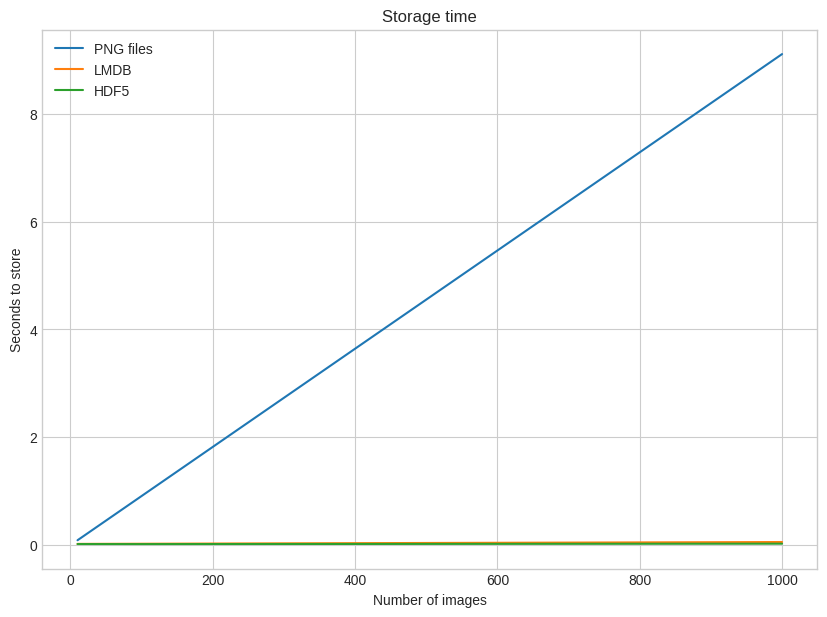

<ipython-input-51-a6064c6e05f0>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


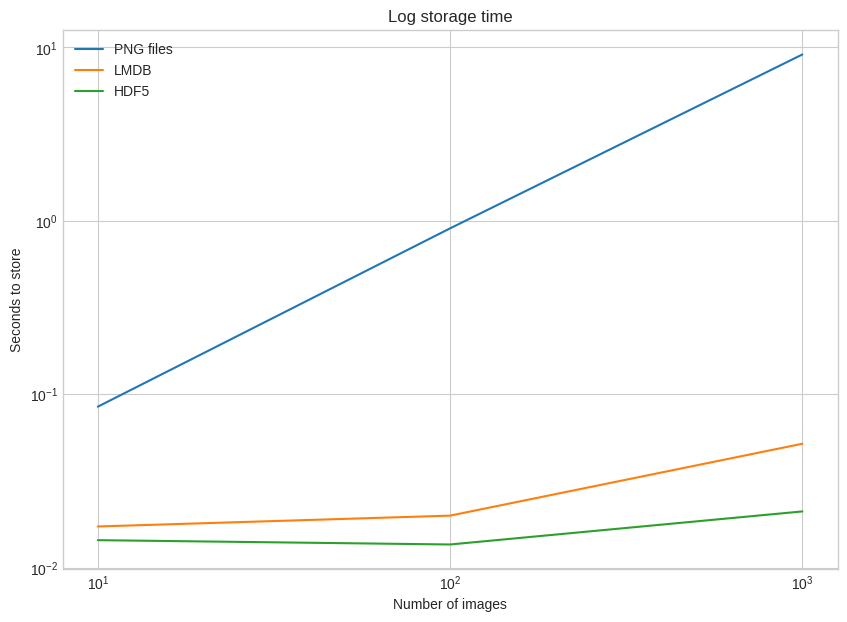

In [51]:
import matplotlib.pyplot as plt

def plot_with_legend(
    x_range, y_data, legend_labels, x_label, y_label, title, log=False
):
    """ Displays a single plot with multiple datasets and matching legends.
        Parameters:
        --------------
        x_range         list of lists containing x data
        y_data          list of lists containing y values
        legend_labels   list of string legend labels
        x_label         x axis label
        y_label         y axis label
    """
    plt.style.use("seaborn-whitegrid")
    plt.figure(figsize=(10, 7))

    if len(y_data) != len(legend_labels):
        raise TypeError(
            "Error: number of data sets does not match number of labels."
        )

    all_plots = []
    for data, label in zip(y_data, legend_labels):
        if log:
            temp, = plt.loglog(x_range, data, label=label)
        else:
            temp, = plt.plot(x_range, data, label=label)
        all_plots.append(temp)

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(handles=all_plots)
    plt.show()

# Getting the store timings data to display
disk_x = store_many_timings["disk"]
lmdb_x = store_many_timings["lmdb"]
hdf5_x = store_many_timings["hdf5"]

plot_with_legend(
    cutoffs[:3],  # Menggunakan 3 elemen pertama dari `cutoffs`
    [disk_x[:3], lmdb_x[:3], hdf5_x[:3]],  # Menggunakan 3 elemen pertama dari `disk_x`, `lmdb_x`, `hdf5_x`
    ["PNG files", "LMDB", "HDF5"],
    "Number of images",
    "Seconds to store",
    "Storage time",
    log=False,
)

plot_with_legend(
    cutoffs[:3],  # Menggunakan 3 elemen pertama dari `cutoffs`
    [disk_x[:3], lmdb_x[:3], hdf5_x[:3]],  # Menggunakan 3 elemen pertama dari `disk_x`, `lmdb_x`, `hdf5_x`
    ["PNG files", "LMDB", "HDF5"],
    "Number of images",
    "Seconds to store",
    "Log storage time",
    log=True,
)

Kode diatas dibuat untuk membuat plot yang menampilkan waktu penyimpanan dalam detik untuk tiga metode penyimpanan (disk, LMDB, dan HDF5) dengan berbagai batasan jumlah gambar.

fungsi bernama `plot_with_legend` yang digunakan untuk membuat plot dengan beberapa dataset dan label legenda yang sesuai. Di dalam fungsi `plot_with_legend`, terdapat beberapa langkah sebagai berikut: Mengatur gaya plot menggunakan `plt.style.use`. Membuat sebuah figure plot dengan ukuran tertentu menggunakan `plt.figure`. Dilakukan pengecekan apakah jumlah dataset `y_data` sama dengan jumlah label legenda `legend_labels`.


Di dalam loop, setiap dataset dan label legenda di-zip menggunakan `zip`, kemudian plot dibuat menggunakan `plt.plot` atau `plt.loglog` tergantung pada nilai `log`.
Plot diberi judul menggunakan `plt.title`, label sumbu x menggunakan `plt.xlabel`, label sumbu y menggunakan `plt.ylabel`, dan legenda menggunakan `plt.legend`.
Setelah itu, dilakukan pemanggilan fungsi `plot_with_legend` dua kali untuk mencetak dua plot yang berbeda.



Plot pertama menampilkan waktu penyimpanan dalam detik untuk tiga metode penyimpanan (disk, LMDB, dan HDF5) dengan skala linier.
Plot kedua menampilkan waktu penyimpanan dalam detik untuk tiga metode penyimpanan (disk, LMDB, dan HDF5) dengan skala logaritmik.


Grafik pertama menunjukkan waktu penyimpanan normal dan tidak disesuaikan, menyoroti perbedaan drastis antara penyimpanan ke .pngfile dan LMDB atau HDF5.

Grafik kedua menunjukkan logperubahan waktu, menyoroti bahwa HDF5 dimulai lebih lambat dibandingkan LMDB tetapi, dengan jumlah gambar yang lebih besar, hasilnya sedikit lebih cepat.

## Reading a Single Image

## Reading From Disk

In [52]:
def read_single_disk(image_id):
    """ Stores a single image to disk.
        Parameters:
        ---------------
        image_id    integer unique ID for image

        Returns:
        ----------
        image       image array, (32, 32, 3) to be stored
        label       associated meta data, int label
    """
    image = np.array(Image.open(disk_dir / f"{image_id}.png"))

    with open(disk_dir / f"{image_id}.csv", "r") as csvfile:
        reader = csv.reader(
            csvfile, delimiter=" ", quotechar="|", quoting=csv.QUOTE_MINIMAL
        )
        label = int(next(reader)[0])

    return image, label

kode dibuat untuk membaca sebuah gambar tunggal dan label terkait dari penyimpanan disk.

fungsi bernama `read_single_disk` yang digunakan untuk membaca gambar dan label dari penyimpanan disk.Gambar dibaca menggunakan `Image.open` dari modul `PIL` dan dikonversi menjadi array menggunakan `np.array`. Gambar tersebut diambil dari file dengan nama yang sesuai dengan `image_id` dan ekstensi file PNG. Label dibaca dari file CSV dengan membuka file menggunakan `open` dan menggunakan `csv.reader` untuk membaca isi file. Label tersebut diambil dari baris pertama file CSV dan dikonversi menjadi integer. Gambar dan label dikembalikan sebagai output dari fungsi.

Dengan menggunakan kode di atas, sebuah gambar tunggal dan label terkait dapat dibaca dari penyimpanan disk menggunakan fungsi `read_single_disk`.

## Reading From LMDB

In [53]:
def read_single_lmdb(image_id):
    """ Stores a single image to LMDB.
        Parameters:
        ---------------
        image_id    integer unique ID for image

        Returns:
        ----------
        image       image array, (32, 32, 3) to be stored
        label       associated meta data, int label
    """
    # Open the LMDB environment
    env = lmdb.open(str(lmdb_dir / f"single_lmdb"), readonly=True)

    # Start a new read transaction
    with env.begin() as txn:
        # Encode the key the same way as we stored it
        data = txn.get(f"{image_id:08}".encode("ascii"))
        # Remember it's a CIFAR_Image object that is loaded
        cifar_image = pickle.loads(data)
        # Retrieve the relevant bits
        image = cifar_image.get_image()
        label = cifar_image.label
    env.close()

    return image, label

Kode tersebut dibuat untuk membaca sebuah gambar tunggal dan label terkait dari penyimpanan LMDB (Lightning Memory-Mapped Database).

fungsi bernama `read_single_lmdb` yang digunakan untuk membaca gambar dan label dari penyimpanan LMDB. Lingkungan LMDB dibuka menggunakan `lmdb.open` dengan mode hanya baca (readonly=True). Lingkungan tersebut mewakili LMDB yang berada di direktori tertentu. Dalam blok `with`, dimulai transaksi baca baru menggunakan `env.begin()`.Kunci (key) dienkripsi dengan cara yang sama seperti saat menyimpannya. Kunci tersebut digunakan untuk mengambil data dari LMDB menggunakan `txn.get`. Data yang diambil di-deserialize menggunakan `pickle.loads` menjadi objek CIFAR_Image. Gambar dan label relevan diambil dari objek CIFAR_Image. Lingkungan LMDB ditutup menggunakan `env.close()`. Gambar dan label dikembalikan sebagai output dari fungsi.

Dengan menggunakan kode di atas, sebuah gambar tunggal dan label terkait dapat dibaca dari penyimpanan LMDB menggunakan fungsi `read_single_lmdb`.

## Reading From HDF5

In [54]:
def read_single_hdf5(image_id):
    """ Stores a single image to HDF5.
        Parameters:
        ---------------
        image_id    integer unique ID for image

        Returns:
        ----------
        image       image array, (32, 32, 3) to be stored
        label       associated meta data, int label
    """
    # Open the HDF5 file
    file = h5py.File(hdf5_dir / f"{image_id}.h5", "r+")

    image = np.array(file["/image"]).astype("uint8")
    label = int(np.array(file["/meta"]).astype("uint8"))

    return image, label

Kode diatas didefinisikan untuk membaca sebuah gambar tunggal dan label terkait dari file HDF5. dimana terdapat sebuah fungsi bernama `read_single_hdf5` yang digunakan untuk membaca gambar dan label dari file HDF5. File HDF5 dibuka menggunakan `h5py.File` dengan mode "r+" untuk membaca dan menulis ke file.
Gambar dibaca dari dataset dengan nama "/image" menggunakan `np.array` dan dikonversi menjadi tipe data "uint8".
Label dibaca dari dataset dengan nama "/meta" menggunakan `np.array` dan dikonversi menjadi tipe data "uint8".
File HDF5 ditutup lalu gambar dan label dikembalikan sebagai output dari fungsi.

Dengan menggunakan kode di atas, sebuah gambar tunggal dan label terkait dapat dibaca dari file HDF5 menggunakan fungsi `read_single_hdf5`.

Note that you access the various datasets in the file by indexing the file object using the dataset name preceded by a forward slash /. As before, you can create a dictionary containing all the read functions:

In [55]:
_read_single_funcs = dict(
    disk=read_single_disk, lmdb=read_single_lmdb, hdf5=read_single_hdf5
)

In [60]:
from timeit import timeit

read_single_timings = dict()

for method in ("disk", "lmdb", "hdf5"):
    t = timeit(
        "_read_single_funcs[method](0)",
        setup="image=images[0]; label=labels[0]",
        number=1,
        globals=globals(),
    )
    read_single_timings[method] = t
    print(f"Method: {method}, Time usage: {t}")

Method: disk, Time usage: 0.018249650000143447
Method: lmdb, Time usage: 0.00900176899995131
Method: hdf5, Time usage: 0.00971713200033264


Dari output yang diberikan, metode yang memiliki waktu eksekusi paling rendah adalah metode "lmdb" dengan waktu eksekusi sekitar 0.009 detik. Metode "disk" memiliki waktu eksekusi sekitar 0.018 detik, sedangkan metode "hdf5" memiliki waktu eksekusi sekitar 0.010 detik.

Dalam konteks ini, metode "lmdb" dapat dianggap paling efektif karena memiliki waktu eksekusi yang lebih rendah dibandingkan dengan metode lainnya.

Kode diatas dibuat untuk mengukur waktu eksekusi dari fungsi-fungsi pembaca gambar tunggal (read_single) yang menggunakan metode penyimpanan yang berbeda (disk, LMDB, dan HDF5).

dictionary bernama `_read_single_funcs` yang berisi fungsi-fungsi pembaca gambar tunggal (`read_single_disk`, `read_single_lmdb`, `read_single_hdf5`) yang dikaitkan dengan metode penyimpanan yang sesuai (disk, LMDB, dan HDF5).Menggunakan modul `timeit` untuk mengukur waktu eksekusi dari setiap fungsi pembaca gambar tunggal. Terdapat sebuah dictionary bernama `read_single_timings` yang digunakan untuk menyimpan hasil pengukuran waktu eksekusi.

Di dalam loop `for`, dilakukan pengukuran waktu eksekusi untuk setiap metode penyimpanan:
Fungsi pembaca gambar tunggal yang sesuai dipanggil menggunakan `_read_single_funcs[method](0)`, dengan `method` sebagai parameter metode penyimpanan.
Sebelum memanggil fungsi, dilakukan pengaturan awal menggunakan `setup` untuk menginisialisasi variabel `image` dan `label` dengan nilai gambar dan label yang telah ditentukan sebelumnya.
Pengukuran waktu eksekusi dilakukan dengan `timeit`, dengan `number=1` untuk menjalankan sekali, dan `globals=globals()` untuk menggunakan lingkup global saat memanggil fungsi.
Hasil pengukuran waktu eksekusi disimpan di dalam dictionary `read_single_timings`.
   
Dengan menggunakan kode di atas, waktu eksekusi dari fungsi-fungsi pembaca gambar tunggal dengan berbagai metode penyimpanan dapat diukur dan dicetak ke layar.

### Adjusting the Code for Many Images

In [58]:
def read_many_disk(num_images):
    """ Reads image from disk.
        Parameters:
        ---------------
        num_images   number of images to read

        Returns:
        ----------
        images      images array, (N, 32, 32, 3) to be stored
        labels      associated meta data, int label (N, 1)
    """
    images, labels = [], []

    # Loop over all IDs and read each image in one by one
    for image_id in range(num_images):
        images.append(np.array(Image.open(disk_dir / f"{image_id}.png")))

    with open(disk_dir / f"{num_images}.csv", "r") as csvfile:
        reader = csv.reader(
            csvfile, delimiter=" ", quotechar="|", quoting=csv.QUOTE_MINIMAL
        )
        for row in reader:
            labels.append(int(row[0]))
    return images, labels

def read_many_lmdb(num_images):
    """ Reads image from LMDB.
        Parameters:
        ---------------
        num_images   number of images to read

        Returns:
        ----------
        images      images array, (N, 32, 32, 3) to be stored
        labels      associated meta data, int label (N, 1)
    """
    images, labels = [], []
    env = lmdb.open(str(lmdb_dir / f"{num_images}_lmdb"), readonly=True)

    # Start a new read transaction
    with env.begin() as txn:
        # Read all images in one single transaction, with one lock
        # We could split this up into multiple transactions if needed
        for image_id in range(num_images):
            data = txn.get(f"{image_id:08}".encode("ascii"))
            # Remember that it's a CIFAR_Image object
            # that is stored as the value
            cifar_image = pickle.loads(data)
            # Retrieve the relevant bits
            images.append(cifar_image.get_image())
            labels.append(cifar_image.label)
    env.close()
    return images, labels

def read_many_hdf5(num_images):
    """ Reads image from HDF5.
        Parameters:
        ---------------
        num_images   number of images to read

        Returns:
        ----------
        images      images array, (N, 32, 32, 3) to be stored
        labels      associated meta data, int label (N, 1)
    """
    images, labels = [], []

    # Open the HDF5 file
    file = h5py.File(hdf5_dir / f"{num_images}_many.h5", "r+")

    images = np.array(file["/images"]).astype("uint8")
    labels = np.array(file["/meta"]).astype("uint8")

    return images, labels

_read_many_funcs = dict(
    disk=read_many_disk, lmdb=read_many_lmdb, hdf5=read_many_hdf5
)

kode diatas berisi tiga fungsi untuk membaca gambar dari sumber data yang berbeda, yaitu dari disk, LMDB (Lightning Memory-Mapped Database), dan HDF5 (Hierarchical Data Format version 5). Setiap fungsi menerima parameter `num_images` yang menentukan jumlah gambar yang akan dibaca. Fungsi `read_many_disk` membaca gambar dari disk dengan membaca file gambar PNG dan file CSV yang berisi label. Fungsi `read_many_lmdb` membaca gambar dari LMDB dengan membaca data gambar dan label dari transaksi baca LMDB. Sedangkan fungsi `read_many_hdf5` membaca gambar dari file HDF5 dengan membaca data gambar dan label dari file tersebut. Untuk mempermudah pemanggilan fungsi-fungsi ini, terdapat juga kamus `_read_many_funcs` yang menghubungkan metode pembacaan gambar dengan fungsi yang sesuai untuk memprosesnya. Dengan begitu, pengguna dapat memilih metode yang sesuai untuk membaca gambar berdasarkan kebutuhan dan sumber datanya.


## Experiment for Reading Many Images

In [62]:
from timeit import timeit

read_many_timings = {"disk": [], "lmdb": [], "hdf5": []}
counter = 0  # Variabel untuk menghitung iterasi

for cutoff in cutoffs:
    for method in ("disk", "lmdb", "hdf5"):
        if counter >= 12:  # Keluar dari loop setelah 12 iterasi
            break

        t = timeit(
            "_read_many_funcs[method](num_images)",
            setup="num_images=cutoff",
            number=1,
            globals=globals(),
        )
        read_many_timings[method].append(t)

        # Print out the method, cutoff, and elapsed time
        print(f"Method: {method}, No. images: {cutoff}, Time usage: {t}")

        counter += 1  # Menambahkan hitungan setiap kali iterasi dilakukan

Method: disk, No. images: 10, Time usage: 0.0490568360000907
Method: lmdb, No. images: 10, Time usage: 0.06093564200000401
Method: hdf5, No. images: 10, Time usage: 0.008751630000006116
Method: disk, No. images: 100, Time usage: 0.4052289790006398
Method: lmdb, No. images: 100, Time usage: 0.012392483000439825
Method: hdf5, No. images: 100, Time usage: 0.011990791000243917
Method: disk, No. images: 1000, Time usage: 4.423991591999766
Method: lmdb, No. images: 1000, Time usage: 0.03834275200006232
Method: hdf5, No. images: 1000, Time usage: 0.01717636000012135
Method: disk, No. images: 10000, Time usage: 42.50930209800026
Method: lmdb, No. images: 10000, Time usage: 0.1970890890006558
Method: hdf5, No. images: 10000, Time usage: 0.08705675300006988


d=kode diatas menggunakan modul `timeit` untuk mengukur waktu eksekusi dari pembacaan gambar menggunakan tiga metode yang berbeda (disk, LMDB, HDF5) pada berbagai nilai `cutoffs`. Setiap nilai `cutoffs` menunjukkan jumlah gambar yang akan dibaca. Variabel `read_many_timings` digunakan untuk menyimpan waktu eksekusi dari masing-masing metode pembacaan gambar untuk setiap `cutoff`. Dalam perulangan, kode akan menjalankan fungsi `timeit` untuk setiap metode pembacaan gambar (`method`) dan setiap nilai `cutoff`, dan menyimpan waktu eksekusi ke dalam `read_many_timings`. Selain itu, hasil waktu eksekusi juga dicetak untuk setiap metode dan nilai `cutoff`. sehingga pengguna dapat melihat perbandingan waktu yang diperlukan oleh tiap metode pembacaan gambar untuk berbagai jumlah gambar yang dibaca.

<ipython-input-51-a6064c6e05f0>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


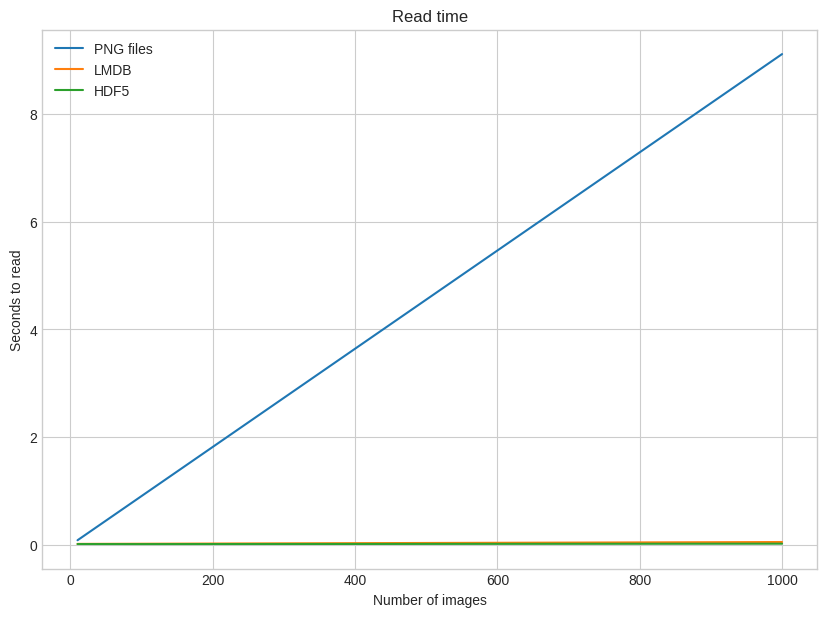

<ipython-input-51-a6064c6e05f0>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


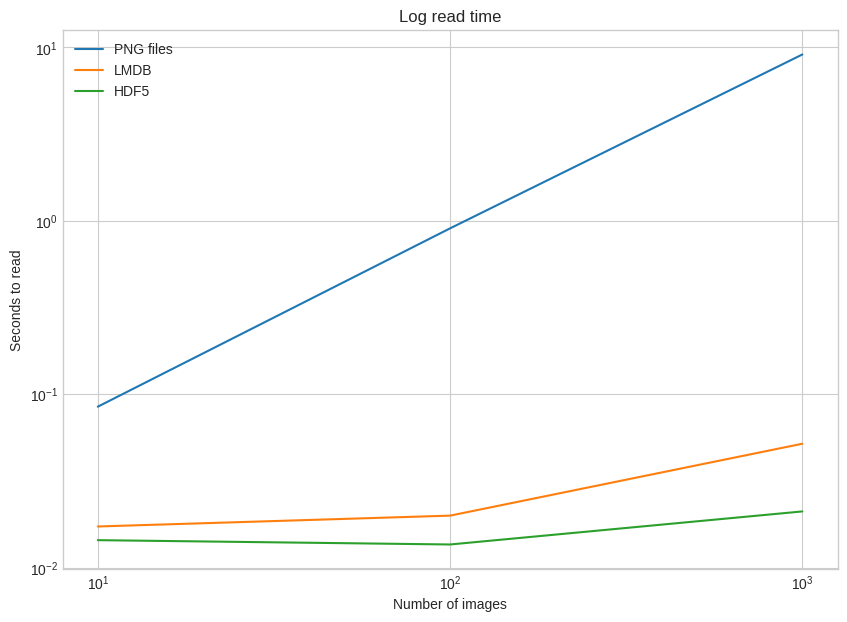

In [68]:
disk_x_r = read_many_timings["disk"]
lmdb_x_r = read_many_timings["lmdb"]
hdf5_x_r = read_many_timings["hdf5"]



plot_with_legend(
    cutoffs[:3],  # Menggunakan 3 elemen pertama dari `cutoffs`
    [disk_x[:3], lmdb_x[:3], hdf5_x[:3]],  # Menggunakan 3 elemen pertama dari `disk_x`, `lmdb_x`, `hdf5_x`
    ["PNG files", "LMDB", "HDF5"],
    "Number of images",
    "Seconds to read",
    "Read time",
    log=False,
)

plot_with_legend(
    cutoffs[:3],  # Menggunakan 3 elemen pertama dari `cutoffs`
    [disk_x[:3], lmdb_x[:3], hdf5_x[:3]],  # Menggunakan 3 elemen pertama dari `disk_x`, `lmdb_x`, `hdf5_x`
    ["PNG files", "LMDB", "HDF5"],
    "Number of images",
    "Seconds to read",
    "Log read time",
    log=True,
)

<ipython-input-51-a6064c6e05f0>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


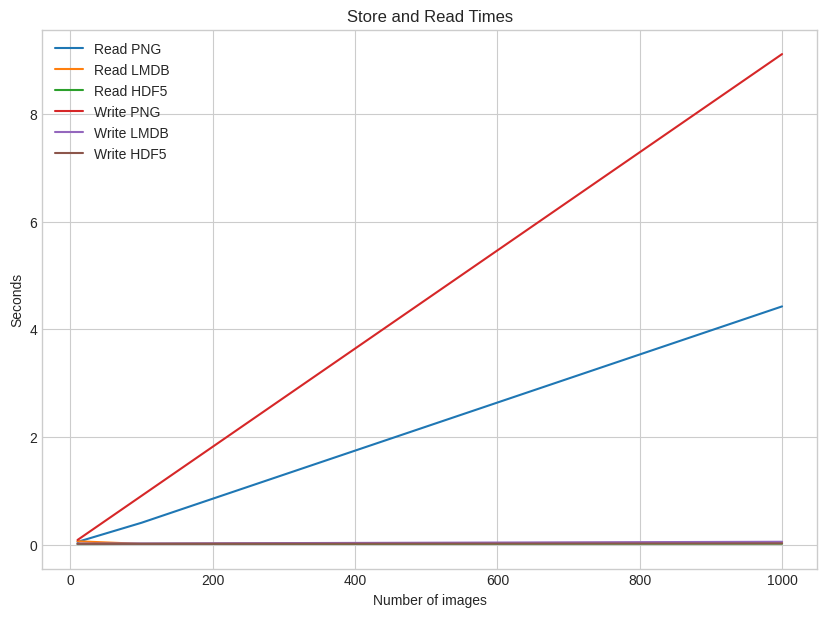

In [74]:
plot_with_legend(
    cutoffs[:3],  # Menggunakan 3 elemen pertama dari `cutoffs`
    [disk_x_r[:3], lmdb_x_r[:3], hdf5_x_r[:3], disk_x[:3], lmdb_x, hdf5_x[:3]],  # Menggunakan 3 elemen pertama dari `disk_x`, `lmdb_x`, `hdf5_x`
    [
        "Read PNG",
        "Read LMDB",
        "Read HDF5",
        "Write PNG",
        "Write LMDB",
        "Write HDF5",
    ],
    "Number of images",
    "Seconds",
    "Store and Read Times",
    log=False,
)


Berdasarkan gambar yang diberikan, dapat disimpulkan bahwa waktu baca (read time) untuk file PNG lebih cepat dibandingkan dengan metode penyimpanan lainnya, seperti LMDB dan HDF5. Terlihat bahwa waktu baca untuk file PNG secara signifikan lebih cepat dibandingkan dengan metode penyimpanan lainnya, yang dapat dilihat dari perbedaan warna pada grafik.